## Converting matplotlib figures to D3.js visualizations with mpld3
**mpld3** library automatically converts matplotlib figures to interactive D3.js visualizations.

In [6]:
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Bug here: only hack solution. Probably want to use pure D3 unless can export

In [7]:
#mpld3 hack
class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        import numpy as np
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)
from mpld3 import _display
_display.NumpyEncoder = NumpyEncoder

In [2]:
from mpld3 import enable_notebook
enable_notebook()

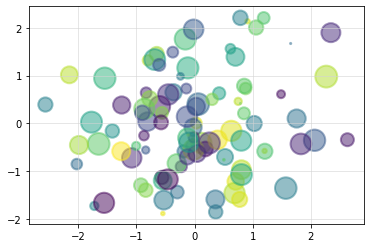

In [8]:
X = np.random.normal(0, 1, (100, 3))
color = np.random.random(100)
size = 500 *np.random.random(100)
plt.scatter(X[:, 0], X[:, 1], c=color, 
            s=size, alpha=0.5, linewidth=2)
plt.grid(color='lightgray', alpha=0.7)

Create a more complex example with multiple subplots that represent different 2D projections of a 3D dataset We use the `sharex` and `sharey` keywords in matplotlib's `subplots()` function to automatically bind the x and y axes of the different figures. Panning and zooming in any of the subplots automatically updates all the other subplots

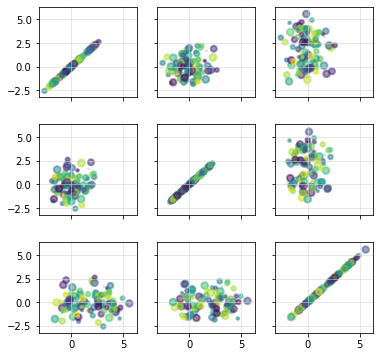

In [9]:
fig, ax = plt.subplots(3, 3, figsize=(6, 6), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.3)
X[::2, 2] += 3
for i in range(3):
    for j in range(3):
        ax[i, j].scatter(X[:, i], X[:, j], c=color, s=.1*size, alpha=0.5, linewidths=2)
        ax[i, j].grid(color='lightgray', alpha=0.7)